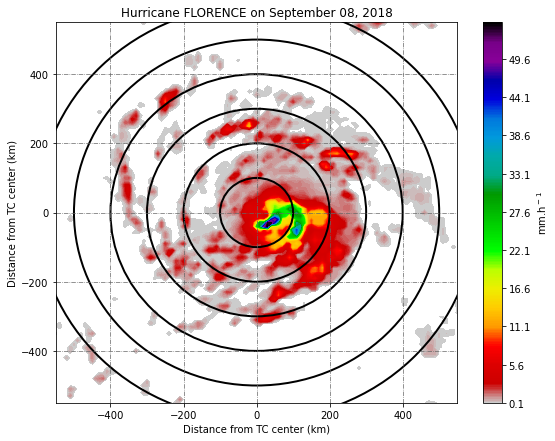

In [2]:
# STEP 1, Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
#import pyart                             # Optional library if colormap for NEXRAD-NWS radars wants to be used
#import warnings                          # Optional library if colormap for NEXRAD-NWS radars wants to be used
#warnings.filterwarnings('ignore')        # Omit warnings when pyart library is used (starts from second time run)

# This is where the images are in Sunny's local system
os.chdir("/Volumes/macOS_1015-Data/Users/sunnyyou/Documents/sunny/palmetto_high/Grade_11/Sci_Fair_2023/IMERG")

# STEP 2, Import the CSV file with the rainfall values.  (For arrays with north pointing upwards)

overpass  = np.loadtxt(open(r"IMERG_CSV/ATL_201806_C1_2018090918.csv", "rb"), delimiter=",")

# STEP 3, Creates supplementary coordinate information requiered to provide spatial reference to the plots
# X and Y values in kilometers starting from the TC center.

base_array = np.zeros (np.shape(overpass))
num_pixels_xy = len(base_array)
array_izq = np.arange((num_pixels_xy)  *-0.5, 0, 1, dtype=int)    # valid for even arrays, adjust when odd number arrays
array_der = np.arange(1, (num_pixels_xy)* 0.5, 1, dtype=int)      # valid for even arrays, adjust when odd number arrays
x = np.concatenate((array_izq, array_der)) * 10
y = np.concatenate((array_izq, array_der)) * 10
X0 = np.asarray (x)
Y0=  np.asarray (y)
[X,Y] = np.meshgrid (X0,Y0)

# STEP 4, Define the plot preferences and create the actual output.

levels = np.arange (0.1, 55, 0.1)                            # Define the levels for the rainfall colormap (min, max, step) 
f,((ax1))= plt.subplots(1,1, figsize=(9, 7))                 # Define number of panels and figure size
cs1 = plt.contourf(X,Y,np.flip(overpass, axis=0),levels)     # Plots the rainfall array making sure north is upwards.
cs1.set_cmap('nipy_spectral_r')                              # Define the color ramp preference
#cs1.set_cmap(pyart.graph.cm.NWSRef)                         # Use this line instead of previous when NWS color is a must.
ax1.set_title  ('Hurricane FLORENCE on September 08, 2018')      # Create the figure's title.
ax1.set_xlim(-550, 550)                                      # Define the effective area to be plotted in TC centered coords
ax1.set_ylim(-550, 550)
ax1.yaxis.set_ticks([-400,-200,0,200,400])                   # Define the grid interval for Y axis
ax1.xaxis.set_ticks([-400,-200,0,200,400])                   # Define the grid interval for X axis
ax1.set_xlabel ('Distance from TC center (km)')              # Captions for X axis
ax1.set_ylabel ('Distance from TC center (km)')              # Captions for X axis
ax1.grid(b=True, which='major', color='#666666', linestyle='-.', linewidth=0.7)             # Plot the grid with the style
circle6 = plt.Circle((0, 0), 600, color='black', linestyle='-', fill=False, linewidth=2)    # Create a circle at 600 km distance
circle5 = plt.Circle((0, 0), 500, color='black', linestyle='-', fill=False, linewidth=2)    # Create a circle at 500 km distance
circle4 = plt.Circle((0, 0), 400, color='black', linestyle='-', fill=False, linewidth=2)    # Create a circle at 400 km distance
circle3 = plt.Circle((0, 0), 300, color='black', linestyle='-', fill=False, linewidth=2)    # Create a circle at 300 km distance
circle2 = plt.Circle((0, 0), 200, color='black', linestyle='-', fill=False, linewidth=2)    # Create a circle at 200 km distance
circle1 = plt.Circle((0, 0), 100, color='black', linestyle='-', fill=False, linewidth=2)    # Create a circle at 100 km distance
ax1.add_patch(circle1)                                       # Add the circles to the plot
ax1.add_patch(circle2)                                       
ax1.add_patch(circle3)
ax1.add_patch(circle4)                                       
ax1.add_patch(circle5)                                       
ax1.add_patch(circle6)
#ax1.arrow(250, -320, -20, 50, color ='black', linewidth= 3, head_length= 20, head_width= 20, zorder= 2)
#ax1.text(-50, -380, '100, 200, and 300-km radius ring', fontsize=12)
plt.colorbar(cs1,ax=ax1, label = 'mm.h$^-$$^1$')             # Create the color bar at the right hand side


plt.savefig("Hurricane_FLORENCE_2018_090918_RI.png", dpi=300)  #This line saves the plot into a png file
plt.show()

In [18]:
def createImage(file):
    overpass  = np.loadtxt(open(file, "rb"), delimiter=",")
    base_array = np.zeros (np.shape(overpass))
    num_pixels_xy = len(base_array)
    array_izq = np.arange((num_pixels_xy)  *-0.5, 0, 1, dtype=int)    # valid for even arrays, adjust when odd number arrays
    array_der = np.arange(1, (num_pixels_xy)* 0.5, 1, dtype=int)      # valid for even arrays, adjust when odd number arrays
    x = np.concatenate((array_izq, array_der)) * 10
    y = np.concatenate((array_izq, array_der)) * 10
    X0 = np.asarray (x)
    Y0=  np.asarray (y)
    [X,Y] = np.meshgrid (X0,Y0)
    levels = np.arange (0.1, 75, 0.1)                            # Define the levels for the rainfall colormap (min, max, step) 
    f,((ax1))= plt.subplots(1,1, figsize=(9, 7))                 # Define number of panels and figure size
    cs1 = plt.contourf(X,Y,np.flip(overpass, axis=0),levels)     # Plots the rainfall array making sure north is upwards.
    cs1.set_cmap('nipy_spectral_r')                              # Define the color ramp preference
    ax1.set_xlim(-550, 550)                                      # Define the effective area to be plotted in TC centered coords
    ax1.set_ylim(-550, 550)
    ax1.yaxis.set_ticks([-400,-200,0,200,400])                   # Define the grid interval for Y axis
    ax1.xaxis.set_ticks([-400,-200,0,200,400])                   # Define the grid interval for X axis
    ax1.set_xlabel ('Distance from TC center (km)')              # Captions for X axis
    ax1.set_ylabel ('Distance from TC center (km)')              # Captions for X axis
    ax1.grid(b=True, which='major', color='#666666', linestyle='-.', linewidth=0.7)             # Plot the grid with the style
    circle1 = plt.Circle((0, 0), 300, color='black', linestyle='-', fill=False, linewidth=2)    # Create a circle at 300 km distance
    circle2 = plt.Circle((0, 0), 200, color='black', linestyle='-', fill=False, linewidth=2)    # Create a circle at 200 km distance
    circle3 = plt.Circle((0, 0), 100, color='black', linestyle='-', fill=False, linewidth=2)    # Create a circle at 100 km distance
    ax1.add_patch(circle1)                                       # Add the circles to the plot
    ax1.add_patch(circle2)                                       
    ax1.add_patch(circle3)                                       
    ax1.arrow(250, -320, -20, 50, color ='black', linewidth= 3, head_length= 20, head_width= 20, zorder= 2)
    ax1.text(-50, -380, '100, 200, and 300-km radius ring', fontsize=12)
    plt.colorbar(cs1,ax=ax1, label = 'mm.h$^-$$^1$')             # Create the color bar at the right hand side
    plt.savefig("App_Assets/" + file[24:-4], dpi=300)  #This line saves the plot into a png file
#     plt.show()
    plt.close()


In [26]:
os.chdir("/Users/hajian/Documents/sunny/palmetto_high/Grade_11/Sci_Fair_2023")
data = pd.read_csv("App_Assets/2019_App_Data_Final.csv")
g = 0
for g in range(len(data.GIS_ID)):
    filename = "IMERG_Data_Old/IMERG_CSV/" + data.GIS_ID[g] + ".csv"
    createImage(filename)
    print(g)
    print(filename)

0
IMERG_Data_Old/IMERG_CSV/ATL_201902_C1_2019071312.csv
1
IMERG_Data_Old/IMERG_CSV/ATL_201905_C1_2019082818.csv
2
IMERG_Data_Old/IMERG_CSV/ATL_201905_C1_2019082900.csv
3
IMERG_Data_Old/IMERG_CSV/ATL_201905_C1_2019082906.csv
4
IMERG_Data_Old/IMERG_CSV/ATL_201905_C1_2019082912.csv
5
IMERG_Data_Old/IMERG_CSV/ATL_201905_C1_2019082918.csv
6
IMERG_Data_Old/IMERG_CSV/ATL_201905_C1_2019083000.csv
7
IMERG_Data_Old/IMERG_CSV/ATL_201905_C2_2019083006.csv
8
IMERG_Data_Old/IMERG_CSV/ATL_201905_C2_2019083012.csv
9
IMERG_Data_Old/IMERG_CSV/ATL_201905_C3_2019083018.csv
10
IMERG_Data_Old/IMERG_CSV/ATL_201905_C4_2019083100.csv
11
IMERG_Data_Old/IMERG_CSV/ATL_201905_C4_2019083106.csv
12
IMERG_Data_Old/IMERG_CSV/ATL_201905_C4_2019083112.csv
13
IMERG_Data_Old/IMERG_CSV/ATL_201905_C4_2019083118.csv
14
IMERG_Data_Old/IMERG_CSV/ATL_201905_C4_2019090100.csv
15
IMERG_Data_Old/IMERG_CSV/ATL_201905_C5_2019090106.csv
16
IMERG_Data_Old/IMERG_CSV/ATL_201905_C5_2019090112.csv
17
IMERG_Data_Old/IMERG_CSV/ATL_201905_C5

In [21]:
# Test a single iteration
os.chdir("/Users/hajian/Documents/sunny/palmetto_high/Grade_11/Sci_Fair_2023")
data = pd.read_csv("App_Assets/2018_App_Data_Final.csv")
g = 0
filename = "IMERG_Data_Old/IMERG_CSV/" + data.GIS_ID[g] + ".csv"
createImage(filename)
print(g)
print(filename)

0
IMERG_Data_Old/IMERG_CSV/ATL_201802_C1_2018070606.csv
